# Importaciones

In [281]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [282]:
path = 'D:/uni/4º año/TFG-GitHub/GII_O_MA_22.07/DatosValidados/SoloDatosValidos_Sensor1.csv'
datos = pd.read_csv(path, index_col=0)

# Pillamos datos cada hora para hacer predicciones por hora
datos = datos[::12]

date_time = pd.to_datetime(datos.pop('fecha'), format='%Y/%m/%d, %H:%M:%S')

datos

,t_ext,h_ext,t_C_cal,h_C_cal,t_L_cal,h_L_cal,h_C,h_L,pluv_delta,t_C_var,h_C_var,t_L_var,h_L_var,mes,hora
0,18.2,74.8,22.8,15.24,23.9,23.42,297.0,322.0,0.0,0.0,0.32,0.0,0.32,8,6
12,17.4,75.0,23.0,14.29,23.9,23.42,294.0,322.0,0.0,0.0,-0.95,0.0,0.00,8,5
24,19.0,66.2,23.2,15.24,23.9,23.10,297.0,321.0,0.0,0.0,0.95,0.0,0.00,8,4
36,18.0,70.0,23.5,14.29,23.9,23.42,294.0,322.0,0.0,0.0,0.00,0.0,0.00,8,3
48,18.9,66.6,23.8,14.60,23.8,23.10,295.0,321.0,0.0,0.0,0.63,0.0,0.00,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90969,12.7,65.9,6.1,15.56,6.8,26.90,298.0,333.0,0.0,0.0,0.00,0.0,0.00,12,13
90981,12.1,67.9,5.9,15.56,6.8,26.27,298.0,331.0,0.0,0.0,-0.31,0.0,-0.63,12,12
90993,9.9,75.3,5.9,15.87,6.8,26.90,299.0,333.0,0.0,0.0,0.63,0.0,0.00,12,11
91005,9.5,75.8,5.9,15.56,6.8,26.90,298.0,333.0,0.0,0.0,0.00,0.0,0.00,12,10


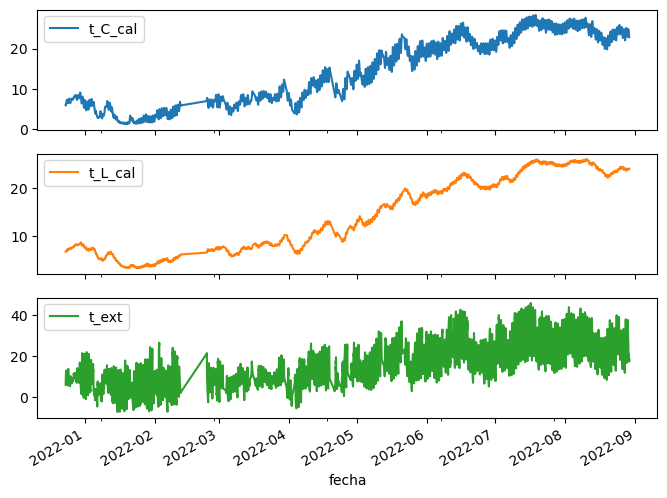

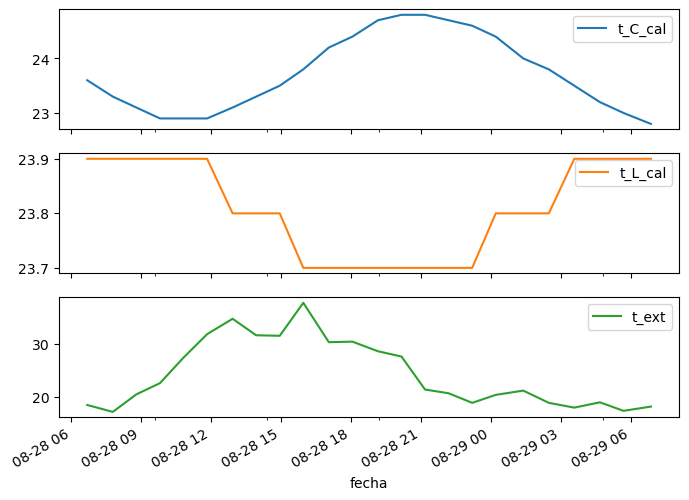

In [283]:
plot_cols = ['t_C_cal', 't_L_cal', 't_ext']
plot_features = datos[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = datos[plot_cols][:24]
plot_features.index = date_time[:24]
_ = plot_features.plot(subplots=True)

In [284]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
t_ext,7315.0,12.507929,11.240085,-7.30,3.80,11.00,19.80,46.00
h_ext,7315.0,60.779289,25.426525,7.50,38.40,63.90,83.90,99.90
t_C_cal,7315.0,11.312044,8.806763,1.30,3.40,7.50,20.60,28.30
h_C_cal,7315.0,18.168232,1.914840,13.02,16.83,17.78,19.05,40.00
t_L_cal,7315.0,11.644839,7.910582,3.40,4.80,7.90,19.80,25.90
h_L_cal,7315.0,25.763126,1.619436,22.78,24.68,25.63,26.90,47.78
h_C,7315.0,306.228298,6.033549,290.00,302.00,305.00,309.00,375.00
h_L,7315.0,329.411483,5.116010,320.00,326.00,329.00,333.00,399.00
pluv_delta,7315.0,0.005878,0.130598,0.00,0.00,0.00,0.00,9.00
t_C_var,7315.0,0.000082,0.040132,-0.20,0.00,0.00,0.00,0.40


In [285]:
datos_norm = datos.copy()

for columna in datos_norm.columns:
    datos_norm[columna] = (datos_norm[columna] - datos_norm[columna].min()) / (datos_norm[columna].max() - datos_norm[columna].min())

datos_norm

,t_ext,h_ext,t_C_cal,h_C_cal,t_L_cal,h_L_cal,h_C,h_L,pluv_delta,t_C_var,h_C_var,t_L_var,h_L_var,mes,hora
0,0.478424,0.728355,0.796296,0.082283,0.911111,0.0256,0.082353,0.025316,0.0,0.333333,0.300787,0.5,0.603774,0.636364,0.260870
12,0.463415,0.730519,0.803704,0.047072,0.911111,0.0256,0.047059,0.025316,0.0,0.333333,0.100787,0.5,0.402516,0.636364,0.217391
24,0.493433,0.635281,0.811111,0.082283,0.911111,0.0128,0.082353,0.012658,0.0,0.333333,0.400000,0.5,0.402516,0.636364,0.173913
36,0.474672,0.676407,0.822222,0.047072,0.911111,0.0256,0.047059,0.025316,0.0,0.333333,0.250394,0.5,0.402516,0.636364,0.130435
48,0.491557,0.639610,0.833333,0.058562,0.906667,0.0128,0.058824,0.012658,0.0,0.333333,0.349606,0.5,0.402516,0.636364,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90969,0.375235,0.632035,0.177778,0.094144,0.151111,0.1648,0.094118,0.164557,0.0,0.333333,0.250394,0.5,0.402516,1.000000,0.565217
90981,0.363977,0.653680,0.170370,0.094144,0.151111,0.1396,0.094118,0.139241,0.0,0.333333,0.201575,0.5,0.006289,1.000000,0.521739
90993,0.322702,0.733766,0.170370,0.105634,0.151111,0.1648,0.105882,0.164557,0.0,0.333333,0.349606,0.5,0.402516,1.000000,0.478261
91005,0.315197,0.739177,0.170370,0.094144,0.151111,0.1648,0.094118,0.164557,0.0,0.333333,0.250394,0.5,0.402516,1.000000,0.434783


In [286]:
column_indices = {name: i for i, name in enumerate(datos_norm.columns)}

n = len(datos_norm)
train_df = datos_norm[0:int(n*0.7)]
val_df = datos_norm[int(n*0.7):int(n*0.9)]
test_df = datos_norm[int(n*0.9):]

num_features = datos_norm.shape[1]

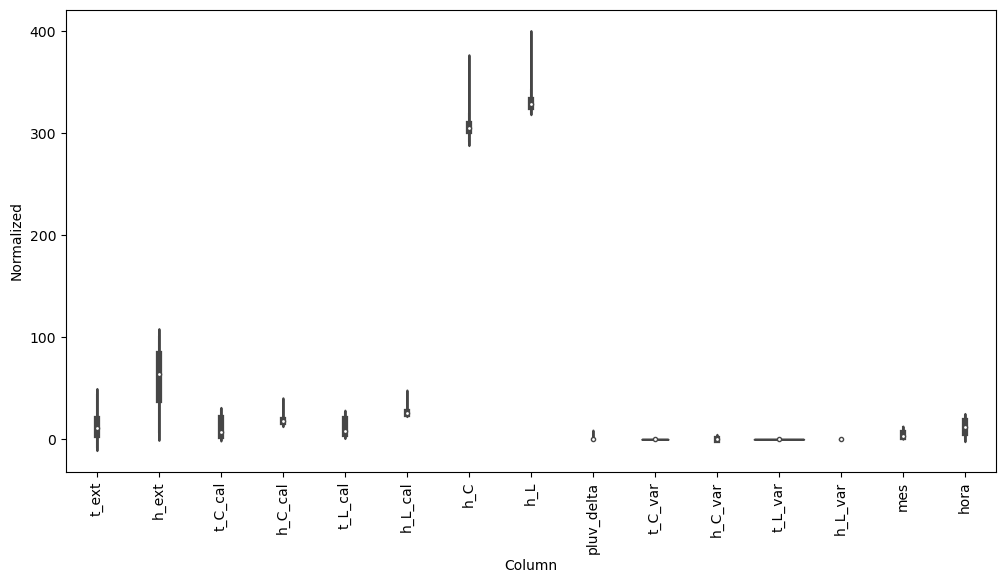

In [287]:
datos_norm = datos.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=datos_norm)
_ = ax.set_xticklabels(datos.keys(), rotation=90)

# Generación de ventanas de datos

In [288]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [289]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['t_C_cal'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['t_C_cal']

In [290]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['t_C_cal'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['t_C_cal']

In [291]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [292]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 15)
Inputs shape: (3, 6, 15)
Labels shape: (3, 1, 1)


In [293]:
w2.example = example_inputs, example_labels

In [294]:
def plot(self, model=None, plot_col='t_C_cal', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

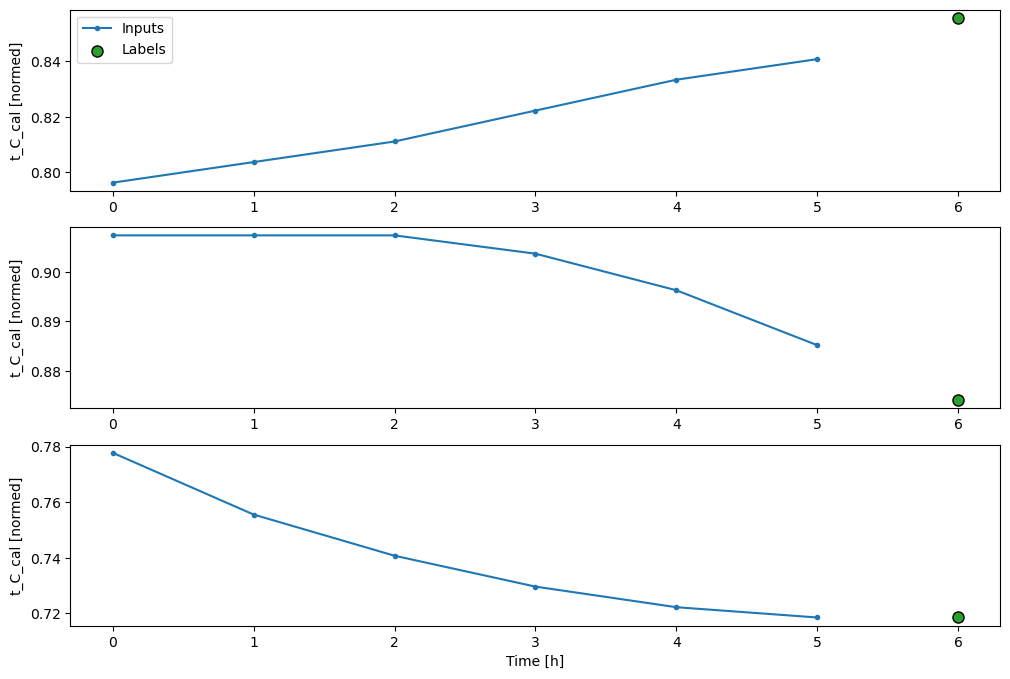

In [295]:
w2.plot()

In [296]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [297]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [298]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['t_C_cal'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['t_C_cal']

# Modelos de un solo paso

## Baseline

In [299]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [300]:
baseline = Baseline(label_index=column_indices['t_C_cal'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanSquaredError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

46/46 [==============================] - 0s 2ms/step - loss: 3.9501e-06 - mean_squared_error: 3.9501e-06


In [301]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['t_C_cal'])

wide_window

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['t_C_cal']

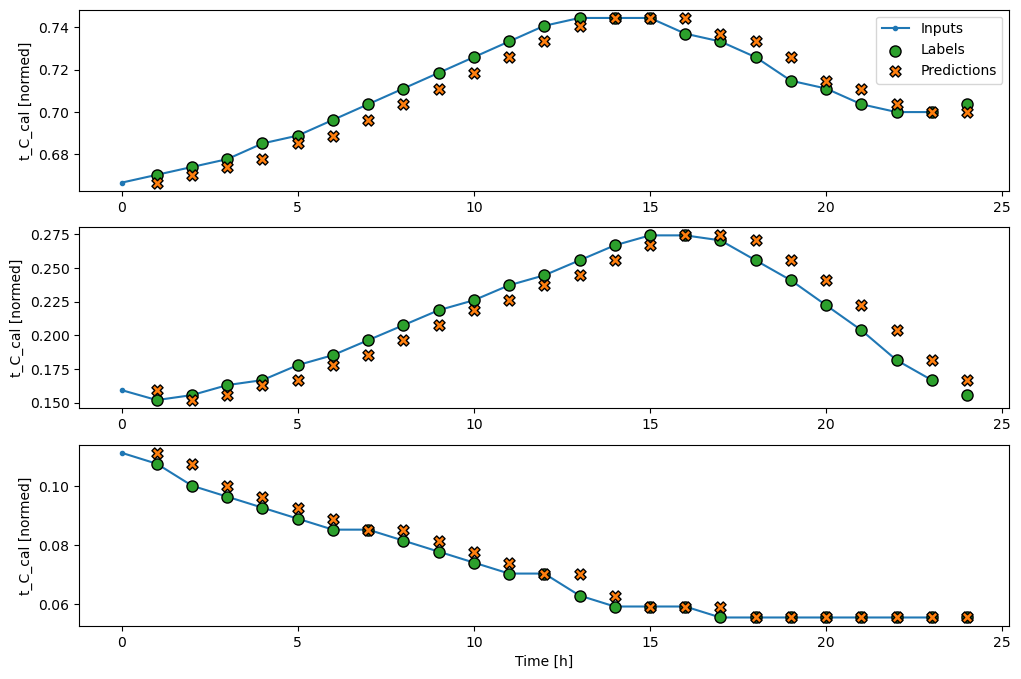

In [302]:
wide_window.plot(baseline)

## Lineal

In [303]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [304]:
MAX_EPOCHS = 200

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [305]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/200
160/160 [==============================] - 1s 2ms/step - loss: 0.5934 - mean_squared_error: 0.5934 - val_loss: 0.1124 - val_mean_squared_error: 0.1124
Epoch 2/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1683 - mean_squared_error: 0.1683 - val_loss: 0.1944 - val_mean_squared_error: 0.1944
Epoch 3/200
160/160 [==============================] - 0s 2ms/step - loss: 0.1056 - mean_squared_error: 0.1056 - val_loss: 0.1482 - val_mean_squared_error: 0.1482
Epoch 4/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0709 - mean_squared_error: 0.0709 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 5/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0465 - mean_squared_error: 0.0465 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 6/200
160/160 [==============================] - 0s 2ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0341 - val_mean_squared_error: 0.0341
Epoch 7/200
160/160 [=

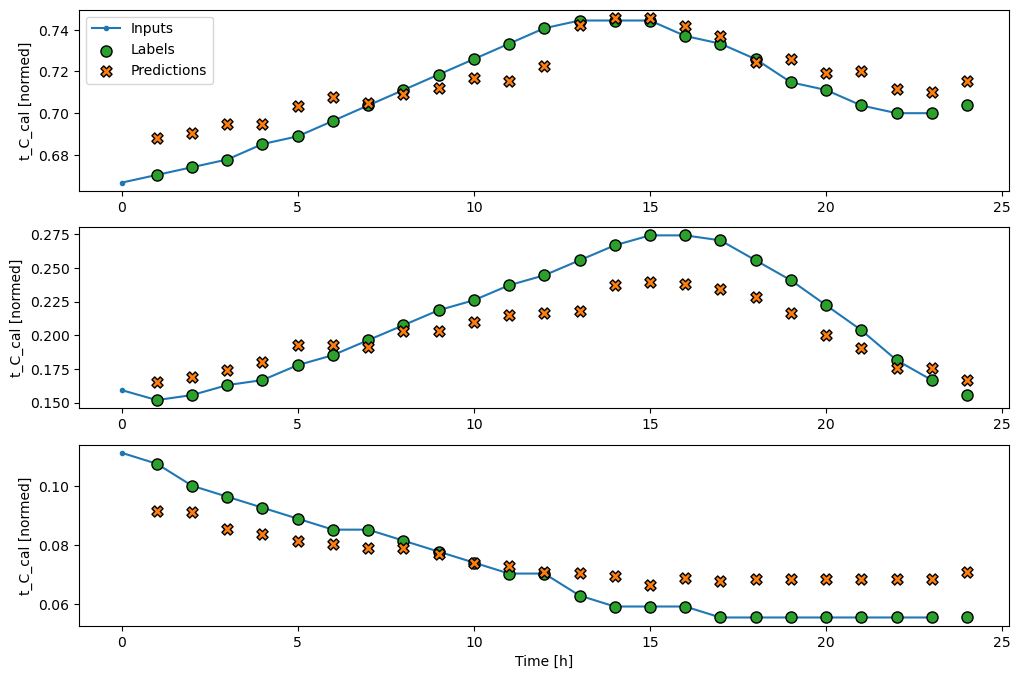

In [306]:
wide_window.plot(linear)

## LSTM

In [307]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [308]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

45/45 [==============================] - 0s 4ms/step - loss: 1.6490e-05 - mean_squared_error: 1.6490e-05


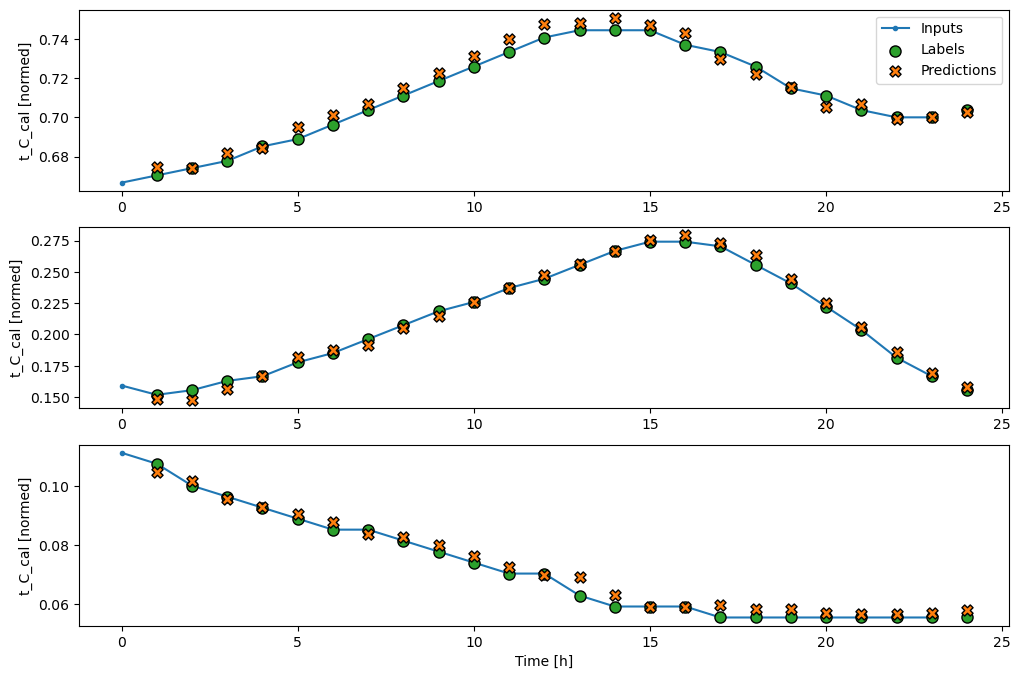

In [309]:
wide_window.plot(lstm_model)

## Rendimiento

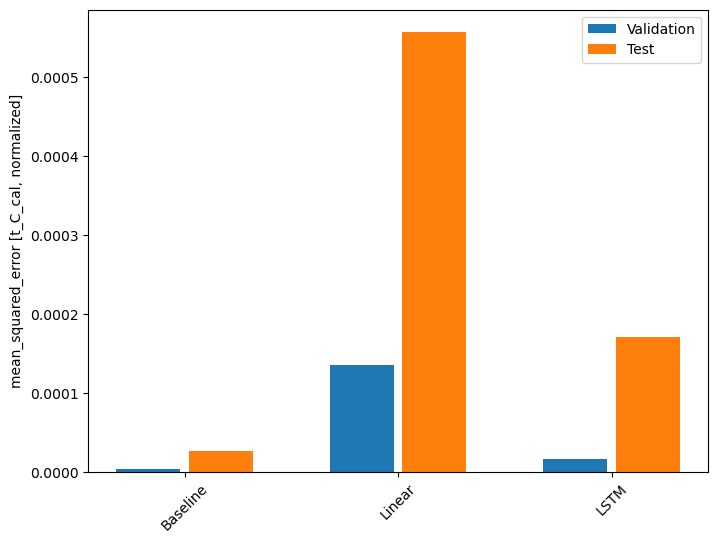

In [310]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_squared_error'
metric_index = lstm_model.metrics_names.index('mean_squared_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_squared_error [t_C_cal, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

# Modelos de varios pasos

## Ventana de datos de 24 horas en el futuro

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

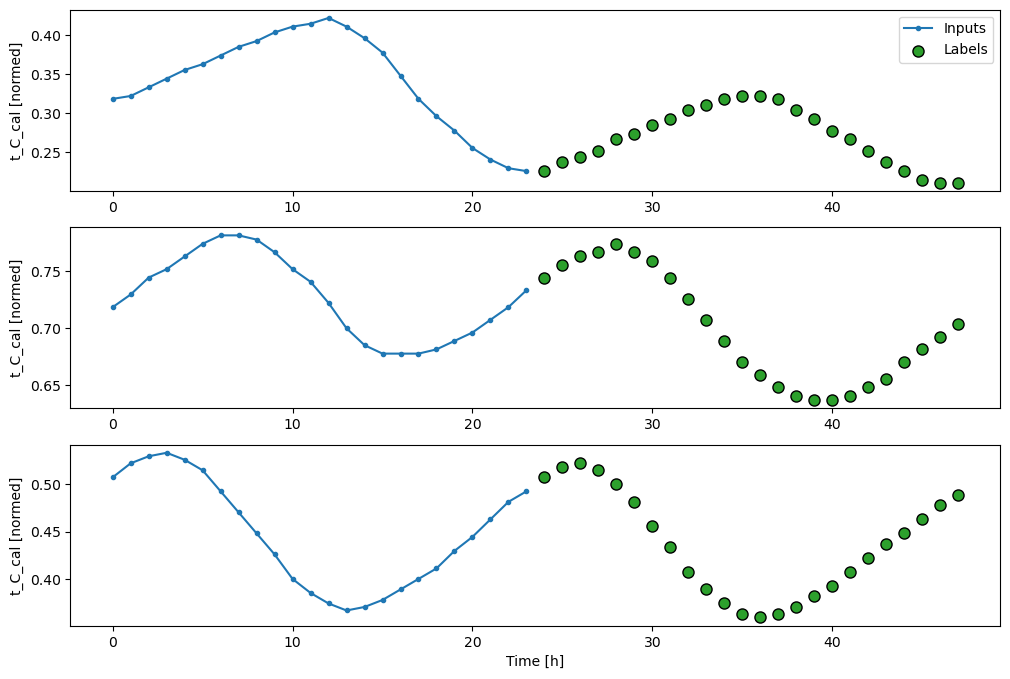

In [311]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

In [312]:
multi_val_performance = {}
multi_performance = {}

## Lineal

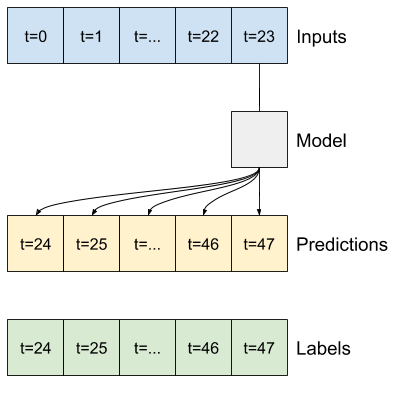

45/45 [==============================] - 0s 1ms/step - loss: 0.0151 - mean_squared_error: 0.0151


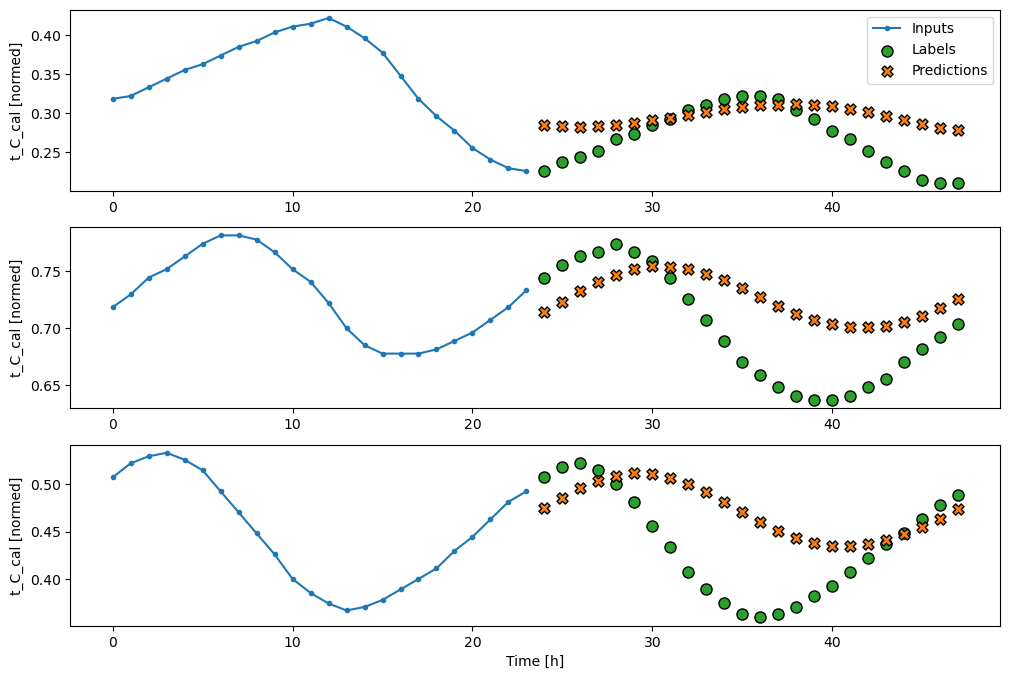

In [313]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

## LSTM recurrente

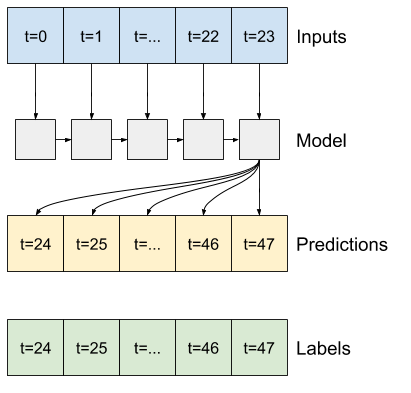

45/45 [==============================] - 0s 4ms/step - loss: 0.0084 - mean_squared_error: 0.0084


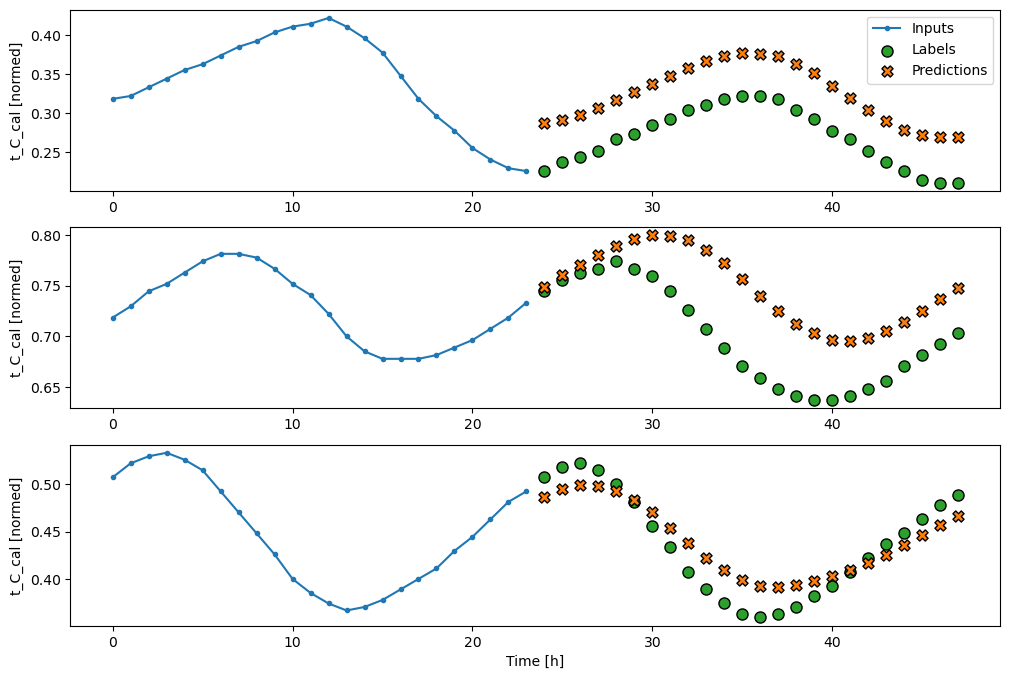

In [314]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

## LSTM autorregresivo

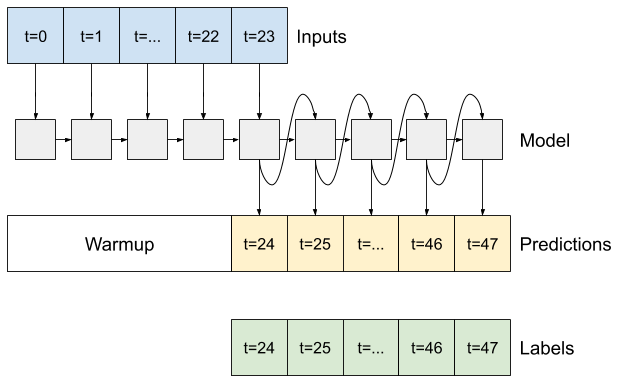

In [315]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [316]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [317]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [318]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

45/45 [==============================] - 0s 6ms/step - loss: 0.0076 - mean_squared_error: 0.0076


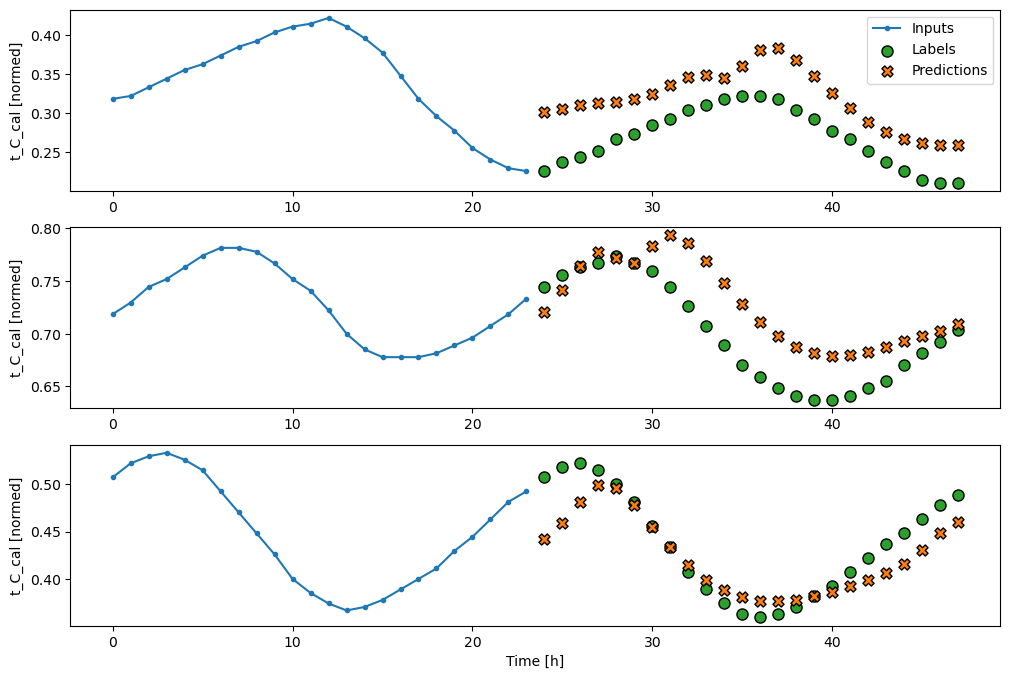

In [319]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

## Rendimiento

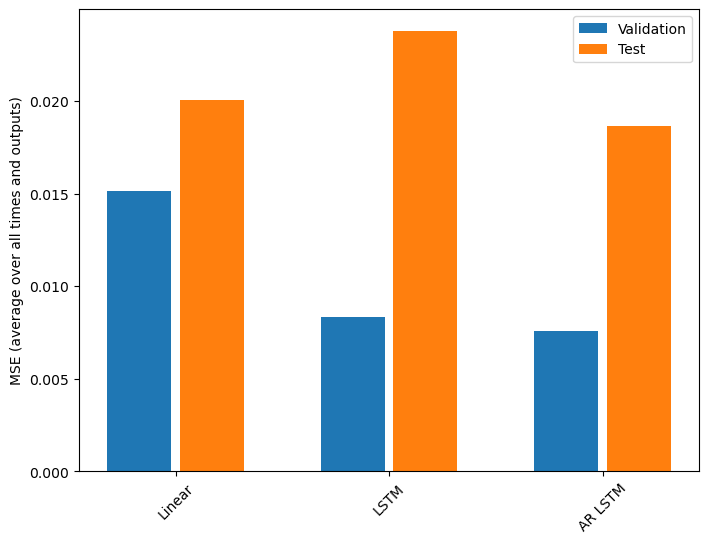

In [320]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_squared_error'
metric_index = lstm_model.metrics_names.index('mean_squared_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MSE (average over all times and outputs)')
_ = plt.legend()

In [339]:
# normalizado = (dato - min) / (max - min)
# normalizado * (max - min) = dato - min
# normalizado * (max - min) + min = dato

valor_original = 0.51 * (datos['t_C_cal'].max() - datos['t_C_cal'].min()) + datos['t_C_cal'].min()
valor_predicho = 0.44 * (datos['t_C_cal'].max() - datos['t_C_cal'].min()) + datos['t_C_cal'].min()

print(f'Valor original: {valor_original}\nValor predicho: {valor_predicho}')

Valor original: 15.07
Valor predicho: 13.180000000000001
